In [216]:
import numpy as np
from scipy.integrate import odeint 
import matplotlib.pylab as plt
import numpy as np

##1. Gráfica de la densidad en función de la altura

In [217]:
ρ0 = 1.29 #kg/m^3
λ = 7482.2 #m

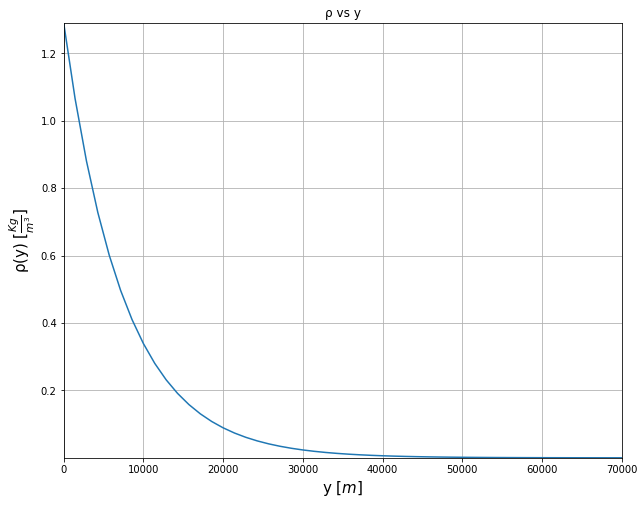

In [218]:
ρ = lambda y: ρ0*np.exp(-y/λ) #Construcción de la función

y_ = np.linspace(0,70E3)

#Graficación
plt.figure(figsize=(10,8))
plt.plot(y_,ρ(y_))
plt.xlabel(r'y $[m]$',size=15)
plt.ylabel(r'ρ(y) $[\frac{Kg}{m^3}]$',size=15)
plt.title('ρ vs y')

plt.xlim(0,70E3)
plt.ylim(min(ρ(y_)),max(ρ(y_)))

plt.grid()

#2. Resolución de la EDO

In [219]:
g = 9.8 #m/s^2
m = 60 #Kg
ρ0 = 1.29 #kg/m^3
A = 0.3 #m^2
δ = 0.5 #adimentional
k0 = (ρ0*A*δ) / (2*m)

params = g, k0

In [220]:
def func(y, t, params):
  
  #Descomposición de la EDO de segundo orden en dos de primer orden
  dydt =  y[1]
  dvdt =  -params[0] + params[1]*(y[1]**2)*np.exp(-y[0]/λ)
  
  return [dydt, dvdt]

In [221]:
#Se definen los intervalos para usar odeint

t = np.linspace(0, 300, 1000000)
h_ini = np.array([30, 40, 50, 60, 70])*1E3
v0 = 0

y_ini = np.zeros((len(h_ini),2))
for i in range(len(h_ini)):
  y_ini[i] = [h_ini[i],v0]

In [222]:
#Se definen las alturas y las velocidades para cada h=y(0)

y1 = odeint(func, y_ini[0], t, args = (params,))
y_1 = y1[:,0]
dy_1 = y1[:,1]

y2 = odeint(func, y_ini[1], t, args = (params,))
y_2 = y2[:,0]
dy_2 = y2[:,1]

y3 = odeint(func, y_ini[2], t, args = (params,))
y_3 = y3[:,0]
dy_3 = y3[:,1]

y4 = odeint(func, y_ini[3], t, args = (params,))
y_4 = y4[:,0]
dy_4 = y4[:,1]

y5 = odeint(func, y_ini[4], t, args = (params,))
y_5 = y5[:,0]
dy_5 = y5[:,1]

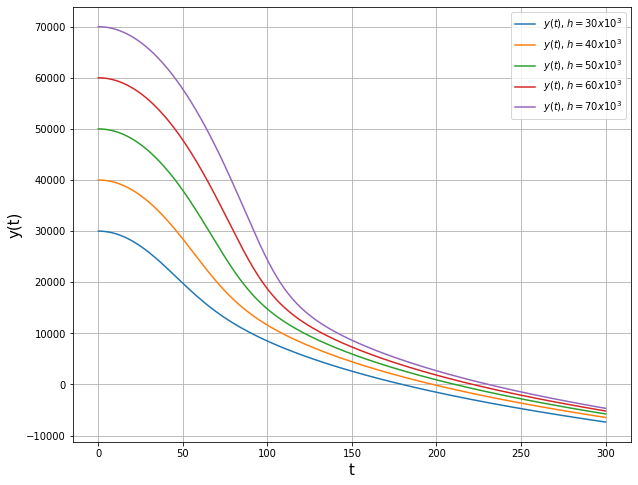

In [223]:
#Altura como función del tiempo

plt.figure(figsize=(10,8))

plt.plot(t,y_1,label='$y(t), h=30x10^3$')
plt.plot(t,y_2,label='$y(t), h=40x10^3$')
plt.plot(t,y_3,label='$y(t), h=50x10^3$')
plt.plot(t,y_4,label='$y(t), h=60x10^3$')
plt.plot(t,y_5,label='$y(t), h=70x10^3$')
plt.legend()

plt.xlabel('t',size=15)
plt.ylabel('y(t)',size=15)

plt.grid()

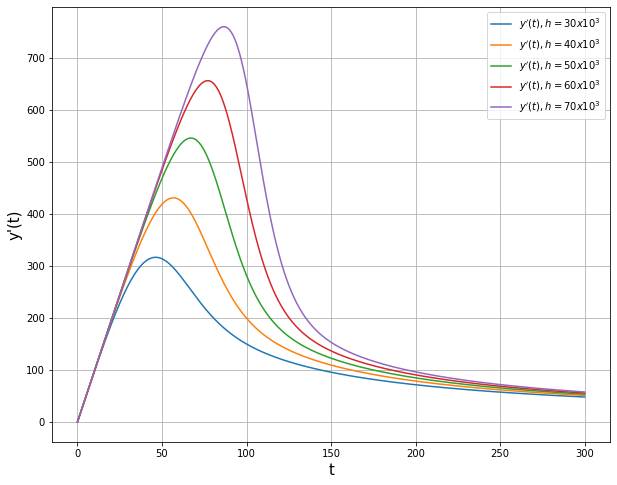

In [224]:
#Velocidad en función del tiempo

plt.figure(figsize=(10,8))

plt.plot(t,-dy_1,label="$y'(t), h=30x10^3$")
plt.plot(t,-dy_2,label="$y'(t), h=40x10^3$")
plt.plot(t,-dy_3,label="$y'(t), h=50x10^3$")
plt.plot(t,-dy_4,label="$y'(t), h=60x10^3$")
plt.plot(t,-dy_5,label="$y'(t), h=70x10^3$")
plt.legend()

plt.xlabel('t',size=15)
plt.ylabel("y'(t)",size=15)

plt.grid()

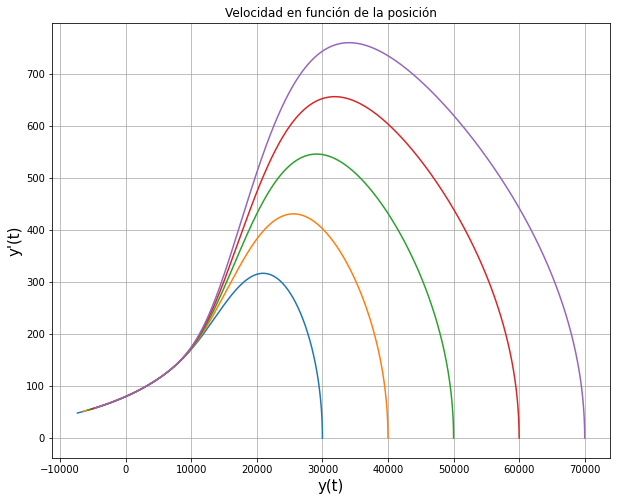

In [225]:
#Graficación de la velocidad en función de la altura

plt.figure(figsize=(10,8))

plt.plot(y_1,-dy_1,label="$yvsy'$ , h=$30x10^3$")
plt.plot(y_2,-dy_2,label="$yvsy'$ , h=$30x10^3$")
plt.plot(y_3,-dy_3,label="$yvsy'$ , h=$30x10^3$")
plt.plot(y_4,-dy_4,label="$yvsy'$ , h=$30x10^3$")
plt.plot(y_5,-dy_5,label="$yvsy'$ , h=$30x10^3$")

plt.xlabel('y(t)',size=15)
plt.ylabel("y'(t)",size=15)
plt.title('Velocidad en función de la posición')

plt.grid()

In [226]:
#Velocidades máximas
vmax_1 = max(-dy_1)
vmax_2 = max(-dy_2)
vmax_3 = max(-dy_3)
vmax_4 = max(-dy_4)
vmax_5 = max(-dy_5)

In [227]:
v = lambda y: (g/k0)*np.exp(y/(2*λ)) #Velocidad máxima en función de la altura

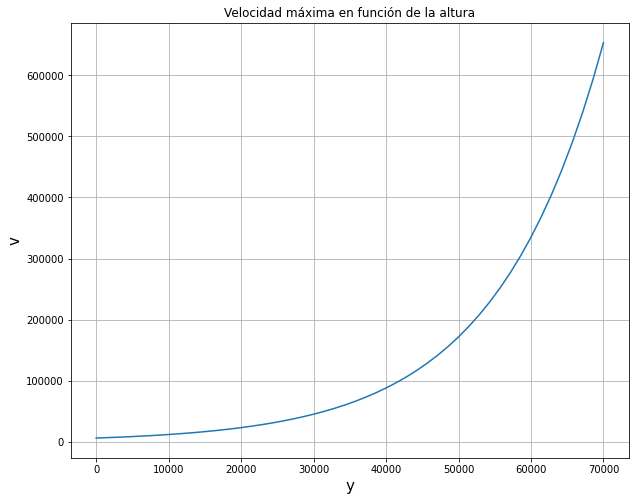

In [228]:
plt.figure(figsize=(10,8))
plt.plot(y_,v(y_))
plt.xlabel('y',size=15)
plt.ylabel('v',size=15)
plt.title('Velocidad máxima en función de la altura')
plt.grid()